In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
from concurrent.futures import ThreadPoolExecutor
import os
import glob
import re
from tqdm import tqdm
import imageio
#import open3d as o3d

import matplotlib.animation as animation

In [3]:

files=glob.glob("./build/dump/data_root/*root")

sorted_files = sorted(files, key=lambda x: int(re.search(r'\d+', x).group()))

#sorted_files = sorted(files, key=lambda x: int(re.search(r'\d+', x).group()))

In [4]:
print(sorted_files)
sorted_files=[sorted_files[2]]

sorted_files

['./build/dump/data_root/output0_1m.root', './build/dump/data_root/output0_10m.root', './build/dump/data_root/output0_10m_v2.root', './build/dump/data_root/output0_100m.root', './build/dump/data_root/output_basic1.root', './build/dump/data_root/output3.root', './build/dump/data_root/output6.root']


['./build/dump/data_root/output0_10m_v2.root']

In [7]:
dump=[]
labels=[]


for file in sorted_files:
    labels.append(file)
    workers=8

    decompression_executor = ThreadPoolExecutor(max_workers=workers)
    interpretation_executor = ThreadPoolExecutor(max_workers=workers)


    with uproot.open(file,num_workers=workers,
                     decompression_executor=decompression_executor,
                     interpretation_executor=interpretation_executor) as file:
        print('start_loading')
        tree = file['B4;1']
        braunches=['ID','enr','leng']
        data=tree.arrays( braunches,library="np")

        # Clean up executors
    decompression_executor.shutdown()
    interpretation_executor.shutdown()

    dump.append(data)


start_loading


In [7]:
# plt.figure(figsize=(10,5))
# plt.hist(dump[0], bins=np.linspace(0,2000,100),alpha=0.5,label='with_ground')
# #a=plt.hist(dump[1], bins=np.linspace(400,1000,100),alpha=0.5,label='without_ground')
# plt.grid(True)
# plt.legend()


In [8]:
data_a=[]
for i in braunches:
    data_a.append(dump[0][i])

In [9]:
data_b=np.vstack(data_a).T
del data_a

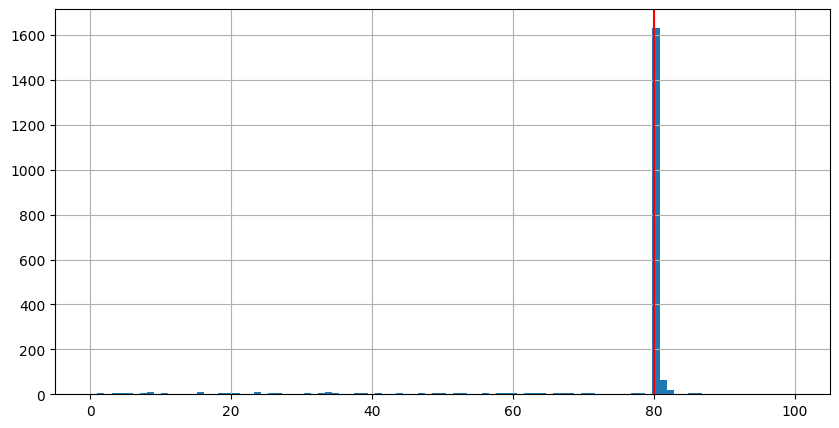

In [11]:
matrix_50=data_b[:,0]==5050

plt.figure(figsize=(10,5))
plt.hist(data_b[matrix_50,2],bins=np.linspace(0,100,100))
plt.grid(True)
plt.axvline(x = 80, color = 'r')
#plt.savefig('fail.png')

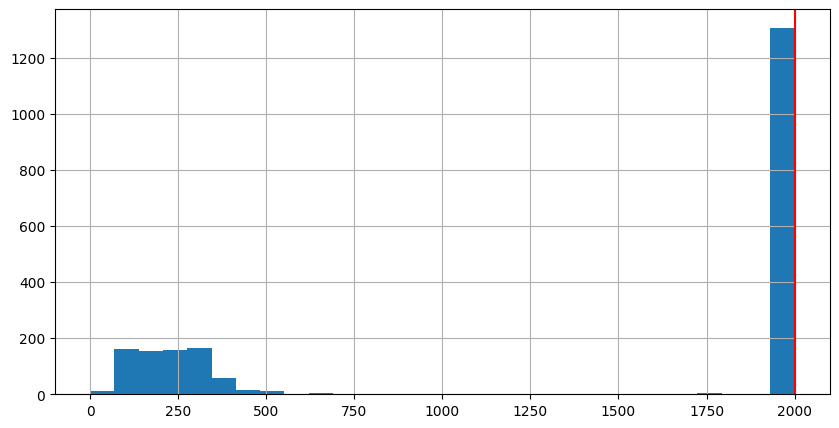

In [12]:
matrix_50=data_b[:,0]==5050

plt.figure(figsize=(10,5))
plt.hist(data_b[matrix_50,1],bins=np.linspace(0,2000,30))
plt.grid(True)
plt.axvline(x = 2000, color = 'r')
#plt.savefig('fail.png')

In [14]:
matrix_50=data_b[:,0]==5050

In [15]:
data_det=data_b[matrix_50,:]

In [17]:
data_det

array([[5050.        ,  382.20510864,   80.09072876],
       [5050.        , 2000.        ,   80.00299072],
       [5050.        , 2000.        ,   57.91543198],
       ...,
       [5050.        , 2000.        ,   80.01088715],
       [5050.        , 2000.        ,   80.09101105],
       [5050.        , 2000.        ,   80.10806274]])